In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("/Users/katierodeghiero/Downloads/data.csv")

In [4]:
data

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Time Duration_Months
0,1,POR,Limited,INITIAL_PURCHASE,App,12/28/2018,6/28/2019,Yes,No,Off,US/Canada,Consumer,App,Yes,Yes,6
1,2,EBR,Limited,INITIAL_PURCHASE,Web,11/28/2019,2/28/2020,No,No,Off,Other,Consumer,Web,No,Yes,3
2,3,ESP,Limited,INITIAL_PURCHASE,Web,12/31/2018,12/31/2019,No,No,Off,US/Canada,Consumer,Web,Yes,Yes,12
3,4,KOR,Limited,INITIAL_PURCHASE,App,11/7/2019,2/7/2020,Yes,No,Off,US/Canada,Consumer,App,Yes,Yes,3
4,5,ENG,Limited,INITIAL_PURCHASE,App,8/13/2019,11/13/2019,No,No,Off,US/Canada,Consumer,Web,Yes,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40093,39996,DEU,Limited,INITIAL_PURCHASE,Web,6/20/2019,4/14/2020,No,No,Off,Other,Other,Unknown,No,No,9
40094,39997,FRA,Limited,RENEWAL,App,2/24/2019,8/23/2019,No,No,Off,Other,Other,Unknown,No,No,5
40095,39998,TUR,Limited,RENEWAL,Web,5/15/2019,8/16/2019,No,No,Off,Europe,Consumer,Web,No,Yes,3
40096,39999,FRA,Limited,INITIAL_PURCHASE,App,12/30/2019,3/30/2020,Yes,No,On,US/Canada,Consumer,Web,Yes,Yes,3


In [5]:
app = pd.read_csv("/Users/katierodeghiero/Downloads/app.csv")

In [6]:
app

,ID,App Session Platform,App Activity Type,App Session Date
0,1,ios,App Launch,3/20/2019
1,2,android,App Launch,12/3/2019
2,3,ios,App Launch,5/2/2019
3,4,ios,App Launch,2/6/2020
4,5,ios,Start,9/14/2019
...,...,...,...,...
809473,6098,ios,Other,10/21/2019
809474,13928,ios,Completed,3/12/2019
809475,1113,android,Other,3/29/2020
809476,571,ios,Start,2/10/2020


In [115]:
(data["Language"]=='ESP').sum()

9844

In [116]:
data.shape

(40098, 16)

In [117]:
print(9844/40098)

0.24549852860491794


Text(0.5, 1.0, 'Purchases by Platform')

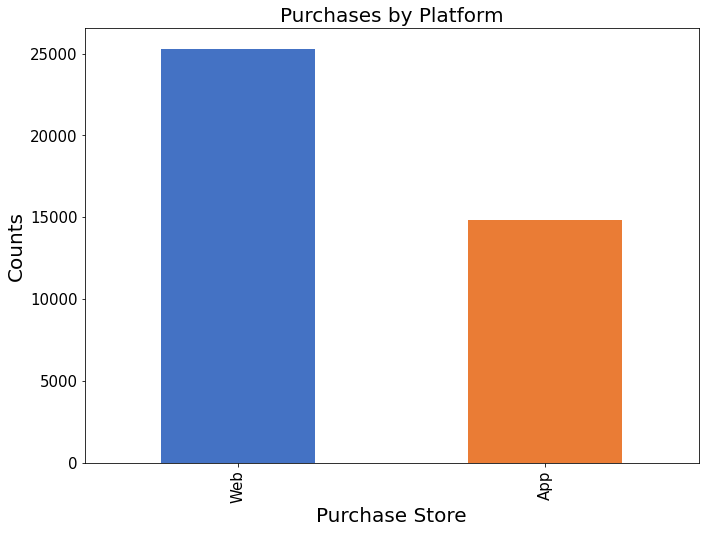

In [77]:
color_list = ["#4472c4","#ea7c35"]
ax = data['Purchase Store'].value_counts().plot(kind='bar',
                                    figsize=(11,8),
                                    color = color_list)
ax.set_xlabel("Purchase Store", size = 20)
ax.set_ylabel("Counts", size = 20)
ax.tick_params(axis='both', labelsize=15)
ax.set_title("Purchases by Platform", 
             fontsize = 20)



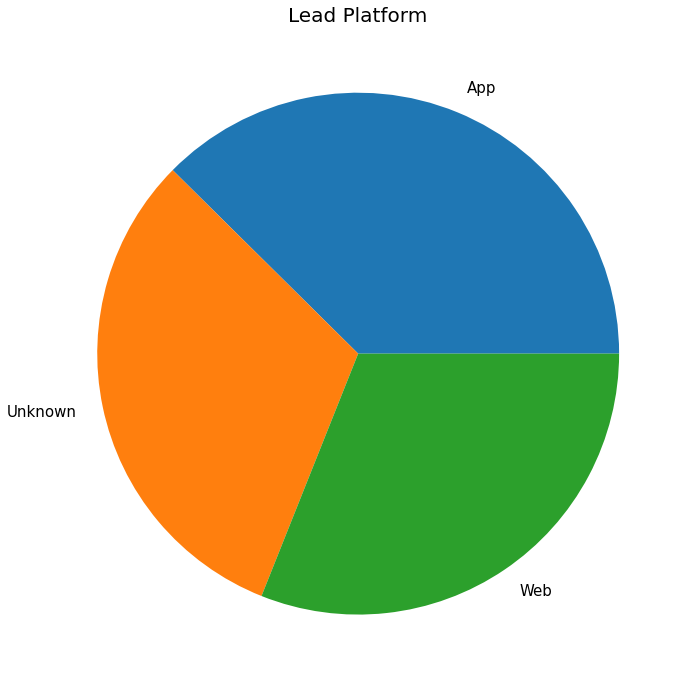

In [108]:
color_list = ["#4472c4","#ea7c35", "#f34c54", "#ffa800", "#00b6cb", "#5e35b1", "#7db544"]
ax = data['Lead Platform'].value_counts().plot(kind='pie',
                                    figsize=(25,12),
                                    fontsize = 15)
ax.set_title("Lead Platform", 
             fontsize = 20)
ax.yaxis.set_visible(False)
#ax.set_xlabel("Purchase Store", size = 20)
#ax.set_ylabel("Counts", size = 20)
# ax.tick_params(axis='both', labelsize=20)
#ax.set_title()

Text(0.5, 1.0, 'Language Learning')

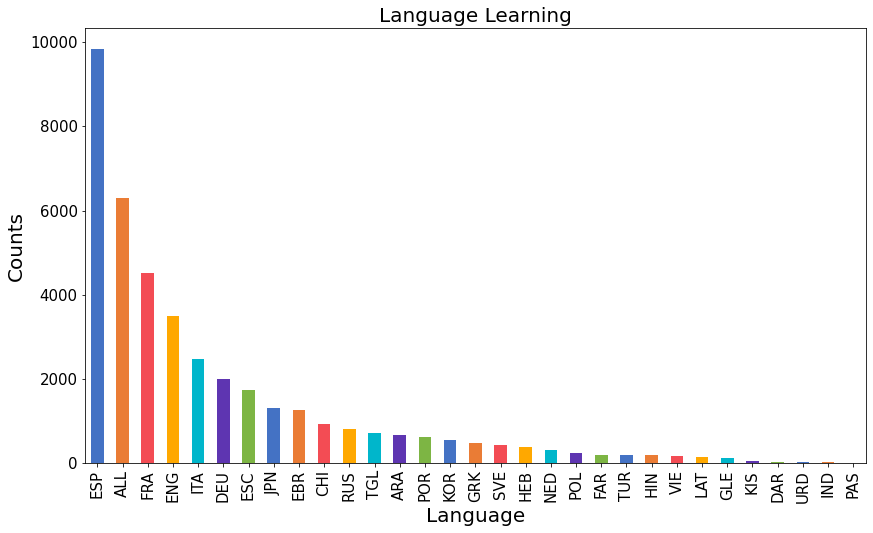

In [111]:
ax = data['Language'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Language Learning",
                                    color = color_list)
ax.set_xlabel("Language", size = 20)
ax.set_ylabel("Counts", size = 20)
ax.tick_params(axis='both', labelsize=15)
ax.set_title("Language Learning", 
             fontsize = 20)

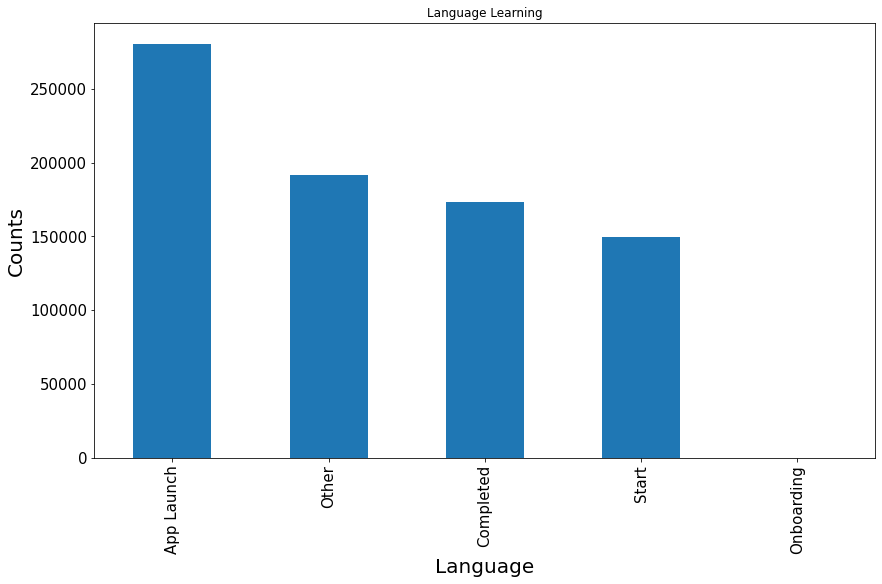

In [30]:
ax = app['App Activity Type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Language Learning")
ax.set_xlabel("Language", size = 20)
ax.set_ylabel("Counts", size = 20)
ax.tick_params(axis='both', labelsize=15)

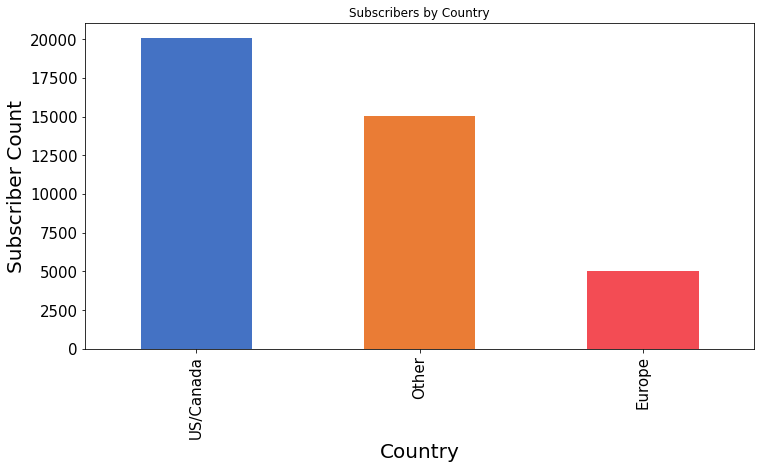

In [34]:
color_list = ["#4472c4","#ea7c35", "#f34c54"]
ax = data['Country'].value_counts().plot(kind='bar',
                                    figsize=(12,6),
                                    title="Subscribers by Country",
                                    color = color_list)
ax.set_xlabel("Country", size = 20)
ax.set_ylabel("Subscriber Count", size = 20)
ax.tick_params(axis='both', labelsize=15)

In [39]:
hold = app["App Activity Type"] == "Completed"
comp_app = app.loc[hold]
comp_app

,ID,App Session Platform,App Activity Type,App Session Date
5,6,android,Completed,8/26/2019
7,8,ios,Completed,2/27/2020
10,11,ios,Completed,5/18/2019
13,14,ios,Completed,3/26/2020
20,21,android,Completed,9/27/2019
...,...,...,...,...
809445,3740,android,Completed,7/9/2019
809448,2492,android,Completed,1/5/2020
809453,7487,ios,Completed,1/8/2020
809462,2577,ios,Completed,2/1/2020


In [67]:
new = comp_app.merge(data, how='left', on='ID')
new.head()


(173942, 19)

In [82]:
new = new.drop_duplicates(subset=['ID'])
new.head()


,ID,App Session Platform,App Activity Type,App Session Date,Language,Subscription Type,Subscription Event Type,Purchase Store,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Time Duration_Months
0,6,android,Completed,8/26/2019,ESP,Limited,INITIAL_PURCHASE,Web,8/23/2019,11/23/2019,Yes,No,Off,US/Canada,Consumer,App,Yes,Yes,3.0
1,8,ios,Completed,2/27/2020,DEU,Limited,INITIAL_PURCHASE,Web,3/7/2020,6/7/2020,Yes,No,On,US/Canada,Consumer,App,Yes,Yes,3.0
2,11,ios,Completed,5/18/2019,FRA,Limited,RENEWAL,App,5/16/2019,5/16/2020,Yes,No,On,Europe,Consumer,App,No,Yes,12.0
3,14,ios,Completed,3/26/2020,ALL,Limited,INITIAL_PURCHASE,Web,3/25/2020,3/25/2022,No,No,On,US/Canada,Consumer,Web,Yes,Yes,24.0
4,21,android,Completed,9/27/2019,JPN,Limited,INITIAL_PURCHASE,Web,6/19/2019,6/19/2020,Yes,No,On,Europe,Consumer,Web,No,Yes,12.0


Text(0.5, 1.0, 'Subscriptions Completed by Languge')

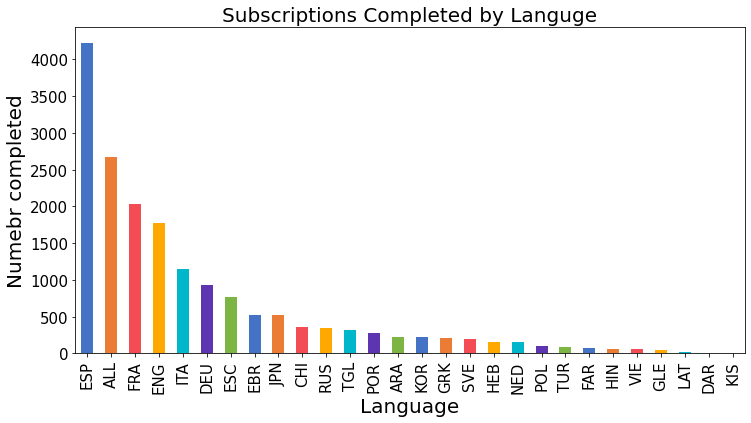

In [118]:
ax = new['Language'].value_counts().plot(kind='bar',
                                    figsize=(12,6),
                                    title="Subscribers Completed by Language",
                                    color = color_list)
ax.set_xlabel("Language", size = 20)
ax.set_ylabel("Numebr completed", size = 20)
ax.tick_params(axis='both', labelsize=15)
ax.set_title("Subscriptions Completed by Languge", 
             fontsize = 20)

In [72]:
print(new.max())

ID                          38941
App Session Platform          web
App Activity Type       Completed
App Session Date         9/9/2019
Time Duration_Months        963.0
dtype: object


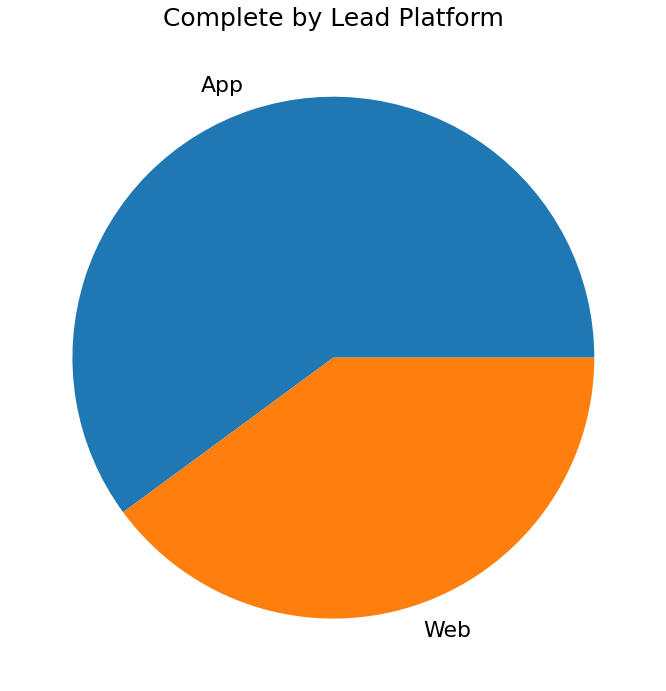

In [120]:
#color_list = ["#4472c4","#ea7c35"]
ax = new['Lead Platform'].value_counts().plot(kind='pie',
                                    figsize=(25,12),
                                    fontsize = 22)
ax.set_title("Complete by Lead Platform", 
             fontsize = 25)
ax.yaxis.set_visible(False)

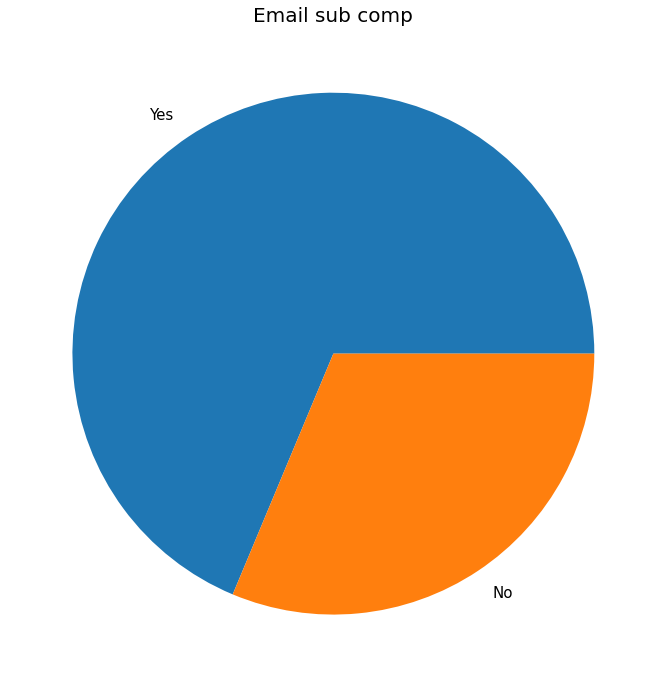

In [84]:
ax = new['Email Subscriber'].value_counts().plot(kind='pie',
                                    figsize=(25,12),
                                    fontsize = 15)
ax.set_title("Email sub comp", 
             fontsize = 20)
ax.yaxis.set_visible(False)

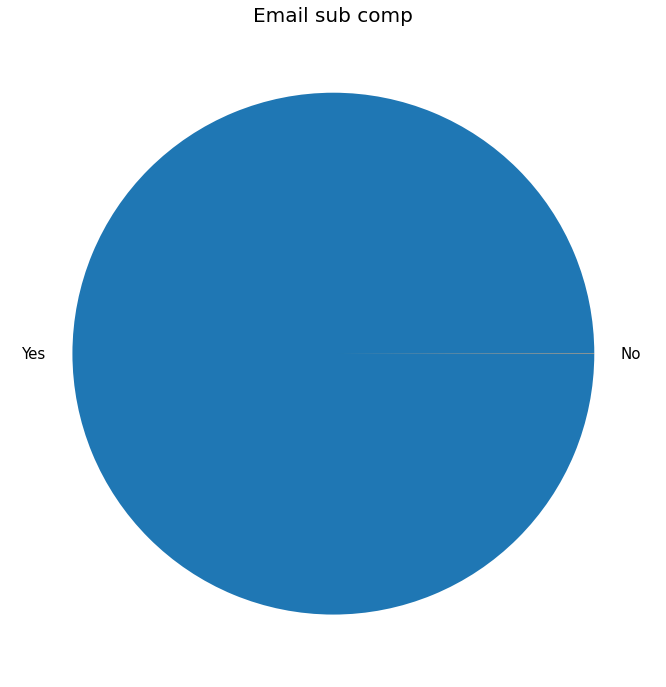

In [86]:
ax = new['Push Notifications'].value_counts().plot(kind='pie',
                                    figsize=(25,12),
                                    fontsize = 15)
ax.set_title("Email sub comp", 
             fontsize = 20)
ax.yaxis.set_visible(False)

In [87]:
new_new = date.merge(app, how='left', on='ID')
new_new = new_new.drop_duplicates(subset=['ID'])

In [90]:
new_new.shape

(17508, 34)

In [92]:
hold2 = app["App Activity Type"] != "Completed"
else_app = app.loc[hold2]
else_app

new_new = else_app.merge(data, how='left', on='ID')
new_new = new_new.drop_duplicates(subset=['ID'])
new_new.shape

(39985, 19)

In [100]:
new_hold = pd.concat([comp_app, else_app], axis=0)
new_new = new_hold.drop_duplicates(subset=['ID'])
new_new = new_new.merge(data, how='left', on='ID')
new_new = new_new.drop_duplicates(subset=['ID'])
new_new.head()

,ID,App Session Platform,App Activity Type,App Session Date,Language,Subscription Type,Subscription Event Type,Purchase Store,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Time Duration_Months
0,6,android,Completed,8/26/2019,ESP,Limited,INITIAL_PURCHASE,Web,8/23/2019,11/23/2019,Yes,No,Off,US/Canada,Consumer,App,Yes,Yes,3.0
1,8,ios,Completed,2/27/2020,DEU,Limited,INITIAL_PURCHASE,Web,3/7/2020,6/7/2020,Yes,No,On,US/Canada,Consumer,App,Yes,Yes,3.0
2,11,ios,Completed,5/18/2019,FRA,Limited,RENEWAL,App,5/16/2019,5/16/2020,Yes,No,On,Europe,Consumer,App,No,Yes,12.0
3,14,ios,Completed,3/26/2020,ALL,Limited,INITIAL_PURCHASE,Web,3/25/2020,3/25/2022,No,No,On,US/Canada,Consumer,Web,Yes,Yes,24.0
4,21,android,Completed,9/27/2019,JPN,Limited,INITIAL_PURCHASE,Web,6/19/2019,6/19/2020,Yes,No,On,Europe,Consumer,Web,No,Yes,12.0


In [105]:
hold = new_new["Subscription Type"] == "Limited"
new_hold = new_new.loc[hold]

new_hold.groupby('Lead Platform')['Time Duration_Months'].mean()

Lead Platform
App        8.013128
Unknown    8.142076
Web        8.747892
Name: Time Duration_Months, dtype: float64

963.0

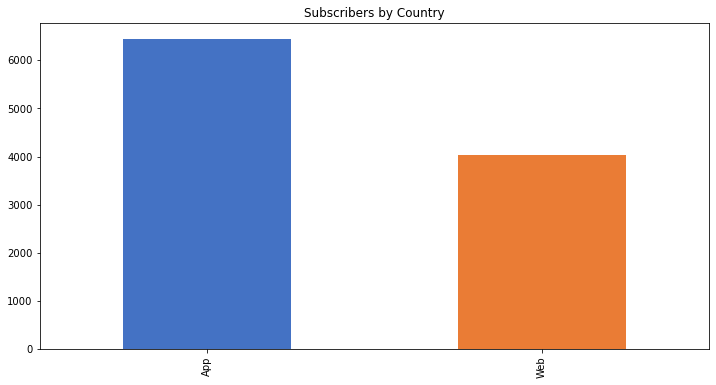

In [113]:
hold = new_new["Subscription Event Type"] == "RENEWAL"
a_hold = new_new.loc[hold]

ax = a_hold['Purchase Store'].value_counts().plot(kind='bar',
                                    figsize=(12,6),
                                    title="Subscribers by Country",
                                    color = color_list)

